## Q1

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [7]:
def mag(x): 
    magnitude = np.sqrt(x[0]**2 + x[1]**2 + x[2]**2)
    return magnitude

In [207]:
def newton(t,array):
    # G = 6.67408e-11
    G = 1
    
    # m1 = 20
    m1 = 400

    # m2 = 5
    m2 = 5



    r1,r2 = array[0],array[1]
    v1,v2 = array[2],array[3]


    r12 = r1-r2
    r21 = r2-r1

    # r13 = r1-r3
    # r23 = r2-r3

    r12_mag = mag(r12)**3
    # r13_mag = mag(r13)**3
    # r23_mag = mag(r23)**3

    a1 = (m2*r21/r12_mag)
    a2 = (m1*r12/r12_mag)

    # print(f"r12:{r12},r21:{r21}")

    return np.array([
        v1,
        v2,
        a1,
        a2,
    ])

In [208]:
def single_step_RK4(x,y,h,f):

    k1 = h*f(x, y)
    k2 = h*f(x+ h*0.5, y + 0.5* k1)
    k3 = h*f(x+ h*0.5, y + 0.5 * k2)
    k4 = h*f(x+ h*1.0 , y + 1.0 * k3)

    y_next = y + ((1/6.0) * (k1 + 2 * k2 + 2 * k3 + k4))
    

    return y_next

In [237]:
t = 0
h = 1e-3
tol = 1e-5

semi_major_axis = 5  # Semi-major axis of the orbit (m)
eccentricity = 0.4

test_array = np.array([
    [0,0,0], ## P1 position
    [10,10,0], ## P2 position
    # [semi_major_axis * (1 + eccentricity),0,0], ## P2 position 

    # [4,0,0], ## P3 position


    [0,0,0], ## P1 Intial Velocity
    # [0,0,0], ## P1 Intial Velocity

    # [np.sqrt( 4 * (2.0 / np.linalg.norm([semi_major_axis * (1 + eccentricity),0,0]) - 1.0 / semi_major_axis)),0,0] ## P2 Intial Velocity
    [1,3,0], ## P3 Intial Velocity

])

output = [test_array]

time = [t]

t = 0
while t < 10:
    a = single_step_RK4(time[-1],output[-1],h,newton)
    output.append(a)
    t+=h
    time.append(t)

Text(0.5, 1.0, 'Postion Graph')

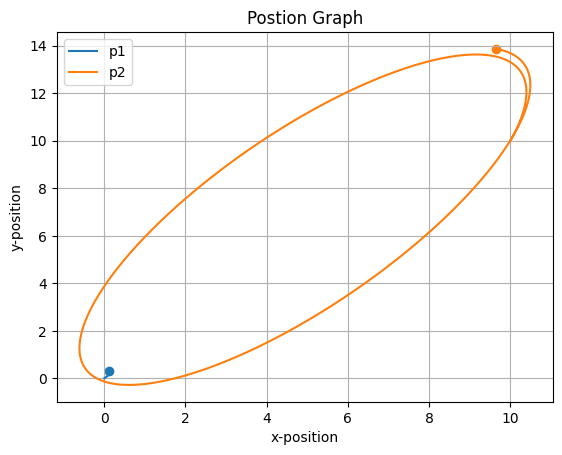

In [238]:
x1_pos = []
x2_pos =[]

y1_pos = []
y2_pos =[]

vx1 = []
vx2 = []


vy1 = []
vy2 = []


for i in range(0,len(output)):
    x1_pos.append(output[i][0][0])
    x2_pos.append(output[i][1][0])
    
    y1_pos.append(output[i][0][1])
    y2_pos.append(output[i][1][1])

    vx1.append(output[i][2][0])
    vx2.append(output[i][3][0])

    vy1.append(output[i][2][1])
    vy2.append(output[i][3][1])


plt.plot(x1_pos,y1_pos,label='p1')
plt.plot(x2_pos,y2_pos,label='p2')

plt.scatter(x1_pos[-1],y1_pos[-1])
plt.scatter(x2_pos[-1],y2_pos[-1])
plt.legend()
plt.grid()

plt.xlabel('x-position')
plt.ylabel('y-position')
plt.title('Postion Graph')

In [264]:
## the time at the nth time step by t_n

def adam_bashforth(h,t,y,f):
    # print(n)
    for n in range((len(t)-4)):
        y[n+1] = y[n] + h*f(t[n],y[n])
        y[n+2] = y[n+1] + h* (3/2*f(t[n+1],y[n+1]) - 1/2*f(t[n],y[n]))
        y[n+3] = y[n+2] + h* (23/12*f(t[n+2],y[n+2])- 16/12*f(t[n+1],y[n+1]) - 5/12*f(t[n],y[n]))
        y[n+4] = y[n+3] + h* (55/24*f(t[n+3],y[n+3]) - 59/24*f(t[n+2],y[n+2])- 37/24*f(t[n+1],y[n+1]) - 9/24*f(t[n],y[n]))

    return 


In [270]:
N = 10
h = 1e-4
t = np.arange(0,50,h)

# test_array = np.array([
#     [0,0,0], ## P1 position
#     [5,5,0], ## P2 position 
#     # [4,0,0], ## P3 position


#     [1,0,0], ## P1 Intial Velocity
#     [0,0,0] ## P2 Intial Velocity
#     # [0,0,0], ## P3 Intial Velocity

# ])

output = [test_array]*len(t)

# for i in range(len(t)-4):
adam_bashforth(h,t,output,newton)

Text(0.5, 1.0, 'Postion Graph')

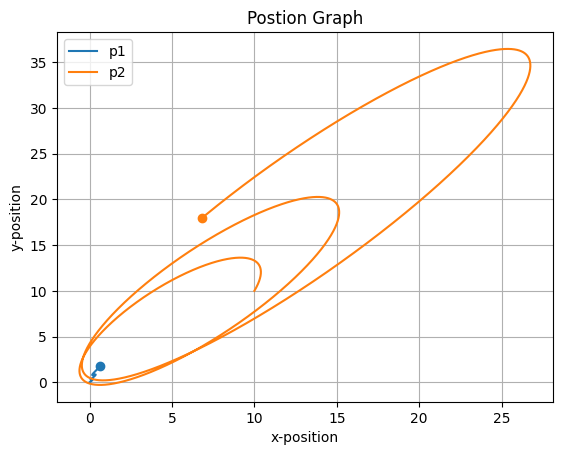

In [271]:
x1_pos = []
x2_pos =[]

y1_pos = []
y2_pos =[]

vx1 = []
vx2 = []


vy1 = []
vy2 = []


for i in range(0,len(output)):
    x1_pos.append(output[i][0][0])
    x2_pos.append(output[i][1][0])
    
    y1_pos.append(output[i][0][1])
    y2_pos.append(output[i][1][1])

    vx1.append(output[i][2][0])
    vx2.append(output[i][3][0])

    vy1.append(output[i][2][1])
    vy2.append(output[i][3][1])


plt.plot(x1_pos,y1_pos,label='p1')
plt.plot(x2_pos,y2_pos,label='p2')

plt.scatter(x1_pos[-1],y1_pos[-1])
plt.scatter(x2_pos[-1],y2_pos[-1])
plt.legend()
plt.grid()

plt.xlabel('x-position')
plt.ylabel('y-position')
plt.title('Postion Graph')

---

## Q2

In [73]:
## Create a grid using the boundary condition 
import numpy as np
import matplotlib.pyplot as plt
N = 1024
# r_min = 6.089380099
r_min = 1
r_max = 10
dr = abs((r_max-r_min)/N)

grid = np.linspace(r_min,r_max,N)
b_coeff = 2/grid ## c_coeff is zero in our case

'''
Askold: b = 2/r, c = 0
'''

ans = np.zeros_like(grid)
ans[0] = 6.1 
'''
Askold: why 6.1? - because it is the boundary condition - use sympy to derive
'''
ans[-1] = 1



tolerance = 1e-6

In [2]:
import numpy as np
?np.copy

Signature: np.copy(a, order='K', subok=False)
Docstring:
Return an array copy of the given object.

Parameters
----------
a : array_like
    Input data.
order : {'C', 'F', 'A', 'K'}, optional
    Controls the memory layout of the copy. 'C' means C-order,
    'F' means F-order, 'A' means 'F' if `a` is Fortran contiguous,
    'C' otherwise. 'K' means match the layout of `a` as closely
    as possible. (Note that this function and :meth:`ndarray.copy` are very
    similar, but have different default values for their order=
    arguments.)
subok : bool, optional
    If True, then sub-classes will be passed-through, otherwise the
    returned array will be forced to be a base-class array (defaults to False).

    .. versionadded:: 1.19.0

Returns
-------
arr : ndarray
    Array interpretation of `a`.

See Also
--------
ndarray.copy : Preferred method for creating an array copy

Notes
-----
This is equivalent to:

>>> np.array(a, copy=True)  #doctest: +SKIP

Examples
--------
Create an array

In [75]:
def gauss_sidel(grid, b_coeff, ans, dr: float, tol: float = 1e-10, iterations: float = 100, w: float = 1, verbose: bool = False):
    # ans_copy = np.copy(ans)

    '''
    Askold: dr = h
    '''
    # for i in range(1,len(grid)-1):
    for i in range(1,iterations-1):
        ans_old = np.copy(ans)

        if verbose:
            print(ans[i],ans_old[i])

        a = ((grid[i]+dr)*ans[i+1] + (grid[i]-dr)*ans[i-1]) / (2*grid[i])
        '''
        B = 2 / grid[i]
        A = B * (grid[i] + h) * ans[i+1] + (grid[i] - h) * ans[i-1]
        '''
        b = (2*np.pi*dr**2)/grid[i]**4
        ans_new = a+b

        # ans_updated[i] = ((1-w)*ans[i]) + w*ans_new
        ans[i] = ((1-w)*ans[i]) + w*ans_new


        # error = ans_updated[i] - ans[i]
        # error =  ((grid[i]+dr)*ans[i+1] + (grid[i]-dr)*ans[i-1]) + b - (2*grid[i]*ans[i])
        error = abs(ans[i] - ans_old[i]) / abs(ans[i])

        # print(abs(error))
        print(ans[i],ans_old[i])

        if abs(error) <= tol:
            print(f'error:{abs(error)} | iter:{i}')
            break

    # return ans_updated



In [76]:
ans_updated = gauss_sidel(grid,b_coeff,ans,dr,tolerance,1000)

0.0 0.0
12.094177202976692 0.0
0.0 0.0
23.979890058399818 0.0
0.0 0.0
47.54953506732906 0.0
0.0 0.0
94.29207465750024 0.0
0.0 0.0
186.99691757614235 0.0
0.0 0.0
370.8719856251114 0.0
0.0 0.0
735.6033069053587 0.0
0.0 0.0
1459.1266831088813 0.0
0.0 0.0
2894.4868476242355 0.0
0.0 0.0
5742.208647580496 0.0
0.0 0.0
11392.386598148827 0.0
0.0 0.0
22603.639390341235 0.0
0.0 0.0
44850.72806083418 0.0
0.0 0.0
88999.52020960931 0.0
0.0 0.0
176616.97947210787 0.0
0.0 0.0
350512.4502032668 0.0
0.0 0.0
695665.1534463743 0.0
0.0 0.0
1380773.5609403837 0.0
0.0 0.0
2740751.768133373 0.0
0.0 0.0
5440534.829497091 0.0
0.0 0.0
10800348.54329198 0.0
0.0 0.0
21441633.67658356 0.0
0.0 0.0
42569793.77416234 0.0
0.0 0.0
84521744.13387814 0.0
0.0 0.0
167825615.14247364 0.0
0.0 0.0
333250346.4244416 0.0
0.0 0.0
661767163.3708956 0.0
0.0 0.0
1314200855.1225748 0.0
0.0 0.0
2609996325.3502517 0.0
0.0 0.0
5183694077.603518 0.0
0.0 0.0
10295794166.133175 0.0
0.0 0.0
20450365361.83665 0.0
0.0 0.0
40622134437.738304 

In [40]:
ans_updated

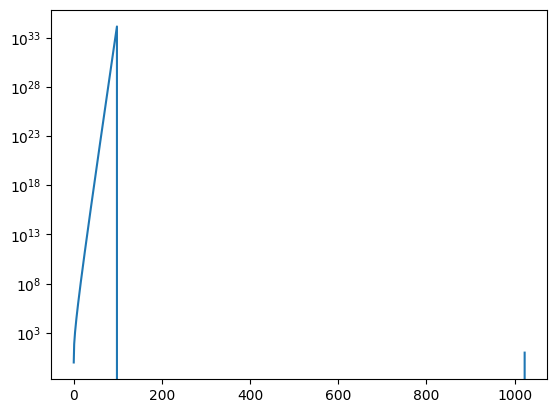

In [42]:
plt.plot(ans)
plt.yscale('log')

In [12]:
x

array([ 0.00000000e+00, -1.33701492e+05, -1.35723125e+05, ...,
       -2.68938901e-06, -1.40485027e-06,  0.00000000e+00])